# PNEUMONIA DETECTION 

## Import Libraries 

In [9]:
import os
import random 
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf 
from ipywidgets import widgets

## Inspect Dataset

In [ ]:
TRAIN_DIR = "chest_xray/train"
TEST_DIR = "chest_xray/test"

train_normal_dir =  os.path.join(TRAIN_DIR, 'NORMAL')
train_pneumonia_dir = os.path.join(TRAIN_DIR, 'PNEUMONIA')
test_normal_dir = os.path.join(TEST_DIR,'NORMAL')
test_pnneumonia_dir = os.path.join(TEST_DIR, "PNEUMONIA")

In [11]:
train_normal_names = os.listdir(train_normal_dir)
print(f"TRAIN SET NORMAL : {train_normal_names[:10]}")

train_pneumonia_names = os.listdir(train_pneumonia_dir)
print(f"TRAIN SET PNEUMONIA : {train_pneumonia_names[:10]}")

test_normal_names = os.listdir(test_normal_dir)
print(f"TEST SET NORMAL : {test_normal_names[:10]}")

test_pnneumonia_names = os.listdir(test_pnneumonia_dir)
print(f"TEST SET PNEUMONIA : {test_pnneumonia_names[:10]}")

TRAIN SET NORMAL : ['NORMAL-1003233-0001.jpeg', 'NORMAL-1012843-0001.jpeg', 'NORMAL-1014768-0001.jpeg', 'NORMAL-1023731-0001.jpeg', 'NORMAL-1029510-0001.jpeg', 'NORMAL-1031320-0001.jpeg', 'NORMAL-1034239-0001.jpeg', 'NORMAL-1041364-0001.jpeg', 'NORMAL-1044645-0001.jpeg', 'NORMAL-1055663-0001.jpeg']
TRAIN SET PNEUMONIA : ['BACTERIA-1008087-0001.jpeg', 'BACTERIA-1025587-0001.jpeg', 'BACTERIA-1027194-0001.jpeg', 'BACTERIA-1033441-0001.jpeg', 'BACTERIA-103798-0001.jpeg', 'BACTERIA-103798-0002.jpeg', 'BACTERIA-1039608-0001.jpeg', 'BACTERIA-1040986-0001.jpeg', 'BACTERIA-1041881-0001.jpeg', 'BACTERIA-1041881-0002.jpeg']
TEST SET NORMAL : ['NORMAL-1049278-0001.jpeg', 'NORMAL-1110860-0001.jpeg', 'NORMAL-11419-0001.jpeg', 'NORMAL-115218-0001.jpeg', 'NORMAL-1160949-0001.jpeg', 'NORMAL-1212407-0001.jpeg', 'NORMAL-1228182-0001.jpeg', 'NORMAL-1283091-0001.jpeg', 'NORMAL-1318320-0001.jpeg', 'NORMAL-1368583-0001.jpeg']
TEST SET PNEUMONIA : ['BACTERIA-1135262-0001.jpeg', 'BACTERIA-1135262-0002.jpeg', '

In [12]:
print(f"number of train NORMAL : {len(train_normal_names)}")
print(f"number of train pneumonia : {len(train_pneumonia_names)}")
print(f"number of test NORMAL : {len(test_normal_names)}")
print(f"number of test PNEUMONIA : {len(test_pnneumonia_names)}")

number of train NORMAL : 1349
number of train pneumonia : 3883
number of test NORMAL : 234
number of test PNEUMONIA : 390


chest_xray/train\NORMAL\NORMAL-5080539-0001.jpeg
chest_xray/train\NORMAL\NORMAL-3006949-0002.jpeg
chest_xray/train\NORMAL\NORMAL-4464072-0001.jpeg
chest_xray/train\NORMAL\NORMAL-4199443-0001.jpeg
chest_xray/train\NORMAL\NORMAL-2983256-0001.jpeg
chest_xray/train\NORMAL\NORMAL-3688916-0002.jpeg
chest_xray/train\NORMAL\NORMAL-3747940-0001.jpeg
chest_xray/train\NORMAL\NORMAL-3665449-0001.jpeg
chest_xray/train\PNEUMONIA\BACTERIA-2516070-0001.jpeg
chest_xray/train\PNEUMONIA\VIRUS-8478954-0002.jpeg
chest_xray/train\PNEUMONIA\BACTERIA-1777631-0007.jpeg
chest_xray/train\PNEUMONIA\BACTERIA-206525-0001.jpeg
chest_xray/train\PNEUMONIA\BACTERIA-8060977-0001.jpeg
chest_xray/train\PNEUMONIA\VIRUS-3879015-0003.jpeg
chest_xray/train\PNEUMONIA\BACTERIA-3451166-0001.jpeg
chest_xray/train\PNEUMONIA\BACTERIA-5555087-0001.jpeg


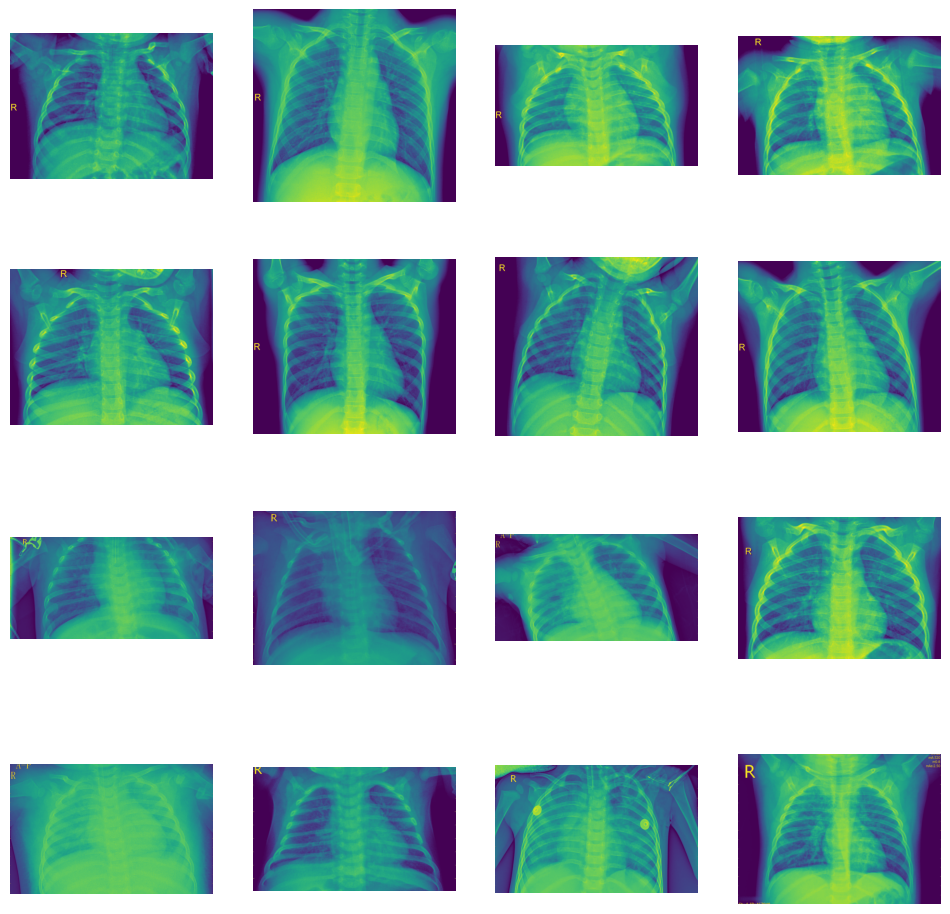

In [16]:
nrows = 4
ncols = 4

fig = plt.gcf()  # gcf => get current figure 
fig.set_size_inches(ncols*3 , nrows*3)

nxt_normal_pic = [os.path.join(train_normal_dir, fname) 
                  for fname in random.sample(train_normal_names, k = 8)]
nxt_pneumonia_pic = [os.path.join(train_pneumonia_dir,fname)
                     for fname in random.sample(train_pneumonia_names, k = 8)]

for i,  img_path in enumerate(nxt_normal_pic + nxt_pneumonia_pic):
    sp = plt.subplot(nrows, nclos, i+1)
    sp.axis('off')
    
    print(img_path)
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

## Build a model

In [ ]:
model = tf.keras.Sequential([
  tf.keras.Input((300,300,3)),
  
  tf.keras.layers.Conv2D(16,(3,3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),  
  
  tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2), 
  
  tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2), 
  
  tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2), 
  
  tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation = 'relu'),
  
  tf. keras.layers.Dense(1, activation= 'sigmoid')
])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss= 'binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

## Data Preprocessing

In [24]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size = (300,300),
    batch_size = 32,
    label_mode = 'binary'
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size = (300,300),
    batch_size = 32,
    label_mode = 'binary'
)

Found 5232 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [25]:
resceale_layer = tf.keras.layers.Rescaling(1./255)

#rescale both datasets
train_dataset_scaled = train_dataset.map(lambda image,label :(resceale_layer(image),label))
test_dataset_scaled = test_dataset.map(lambda image,label : (resceale_layer(image),label))

In [26]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset_scaled.cache().shuffle(SHUFFLE_BUFFER_SIZE).prefetch(PREFETCH_BUFFER_SIZE))
test_dataset_final = (test_dataset_scaled.cache().prefetch(PREFETCH_BUFFER_SIZE))

## Training 

In [27]:
history = model.fit(
    train_dataset_final,
    epochs= 15,
    validation_data = test_dataset_final
)

Epoch 1/15
164/164 ━━━━━━━━━━━━━━━━━━━━ 114s 507ms/step - accuracy: 0.7237 - loss: 0.5943 - val_accuracy: 0.8013 - val_loss: 0.3941
Epoch 2/15
164/164 ━━━━━━━━━━━━━━━━━━━━ 88s 535ms/step - accuracy: 0.9151 - loss: 0.2277 - val_accuracy: 0.8317 - val_loss: 0.5550
Epoch 3/15
164/164 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.9539 - loss: 0.1205 - val_accuracy: 0.8237 - val_loss: 0.6088
Epoch 4/15
164/164 ━━━━━━━━━━━━━━━━━━━━ 89s 541ms/step - accuracy: 0.9654 - loss: 0.0996 - val_accuracy: 0.7115 - val_loss: 1.6628
Epoch 5/15
164/164 ━━━━━━━━━━━━━━━━━━━━ 94s 574ms/step - accuracy: 0.9790 - loss: 0.0605 - val_accuracy: 0.8494 - val_loss: 0.5876
Epoch 6/15
164/164 ━━━━━━━━━━━━━━━━━━━━ 87s 532ms/step - accuracy: 0.9755 - loss: 0.0653 - val_accuracy: 0.7244 - val_loss: 2.7361
Epoch 7/15
164/164 ━━━━━━━━━━━━━━━━━━━━ 88s 535ms/step - accuracy: 0.9733 - loss: 0.0826 - val_accuracy: 0.8189 - val_loss: 1.1734
Epoch 8/15
164/164 ━━━━━━━━━━━━━━━━━━━━ 85s 520ms/step - accuracy: 0.9821 - loss: 0.

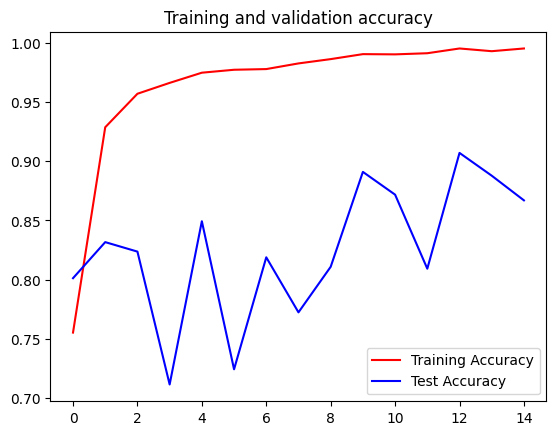

In [30]:
acc = history.history['accuracy']
val_acc = history.history["val_accuracy"]
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc , 'r', label = 'Training Accuracy')
plt.plot(epochs,val_acc, 'b', label = 'Test Accuracy ')


plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

In [31]:
# Save the model
model.save('pneumonia_model.h5')